<h1>Unemployment Rate Data Analysis</h1>
<p>Rate in Brazil during Pandemy</p>

In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


<p>I tried in the some of the sites, but not got a answered that I wanted then I was reading a newspaper from an influencer economist in the Linkedin, and there is a font then I research to know and I found the PNAD from IBGE</p>
<p>First tried, I got the data from the <a href="https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?=&t=series-historicas&utm_source=landing&utm_medium=explica&utm_campaign=desemprego"> BGE </a> but, I couldn't get the information, it was not updated</p>
<p>Second tried, I got the data from the <a href="https://www.ibge.gov.br/estatisticas/sociais/trabalho/17270-pnad-continua.html?=&t=series-historicas"> PNAD </a> It was run</p>
<p>The problem is that PNAD disponibility your this data each three month</p>

<h2>Data Collect</h2>

In [322]:
df = pd.read_csv('dataset/20200621024816.csv', sep=';', header=1, skipfooter=1)

<ipython-input-322-d31fc2f8a34e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('dataset/20200621024816.csv', sep=';', header=1, skipfooter=1)


<h2>Data Preparation</h2>

In [323]:
# I perated only month and year to simplifier header
col_list = []
for i in df.columns.str.split('-'):
    col_list.append(i[-1])

df.columns = col_list

In [324]:
# This case I invert the columns to row, because the plot and because it's more simple
df_2 = pd.DataFrame()
df_2['data'] = df.keys()
df_2['taxa'] = df.values[0] # get the column [0] because must be a one dimentional
df = df_2.drop(0, axis=0) # delete old column

# Convert object to numeric
df['taxa'] = pd.to_numeric(df.taxa)
# dividing year and month, to better filter if necessary
df['ano'] = df['data'].str.extract(r'(\d+)') # extract only number
df['mes'] = df['data'].str.extract(r"(\w*)") # extract only letter from a to z

# Replace Portuguese way to English way, because to convert string to date
# it's must be in English language
df['mes'] = df.mes.map({
    'jan':'Jan',
    'fev':'Feb',
    'mar':'Mar',
    'abr':'Apr',
    'mai':'May',
    'jun':'Jun',
    'jul':'Jul',
    'ago':'Aug',
    'set':'Sep',
    'out':'Oct',
    'nov':'Nov',
    'dez':'Dec'
})
# concating data and converting to datetime format with pandas
df['data'] = pd.to_datetime(df['mes'] + '-' + df['ano'])
#df = df.drop(['ano', 'mes'], axis=1).copy() # deleting the old dates (year and month)

<h2>Filter</h2>

In [306]:
# first of all we will filter trimester of all year
# the month here is the corrent closed, it's not the competense, exemple
# the month 02 corresponding by month 01

df_tri = df[(df['data'].dt.month >= 2) & (df['data'].dt.month <= 4)]

# Filter grouped by year
df_pri_tri_ano = df[(df['data'].dt.month >= 2) & (
                 df['data'].dt.month <= 4)] # filter months
df_pri_tri_ano = df_pri_tri_ano.groupby(
                 by=df_pri_tri_ano['data'].dt.year).sum() #sum from year

# Filter grouped by month
df_pri_tri_mes = df[(df['data'].dt.month >= 2) & (
                 df['data'].dt.month <= 4)] # filter months
df_pri_tri_mes = df_pri_tri_mes.groupby(
                 by=df_pri_tri_mes['data'].dt.month).sum() #sum from year

<h2>Visualization</h2>

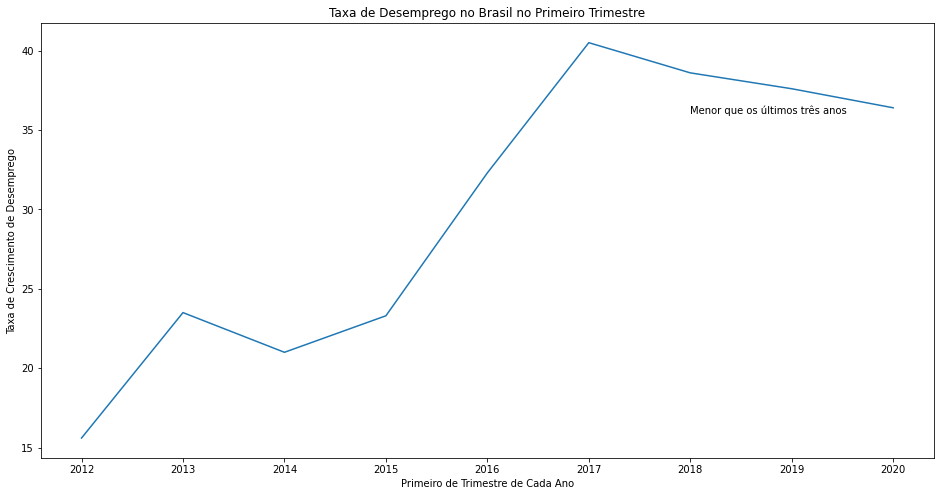

In [312]:
plt.figure(figsize=(16,8))
plt.plot(df_pri_tri_ano.index, df_jan_feb_mar)
plt.title('Taxa de Desemprego no Brasil no Primeiro Trimestre')
plt.xlabel('Primeiro de Trimestre de Cada Ano')
plt.ylabel('Taxa de Crescimento de Desemprego')
plt.text(2018, 36, 'Menor que os últimos três anos')
plt.show()

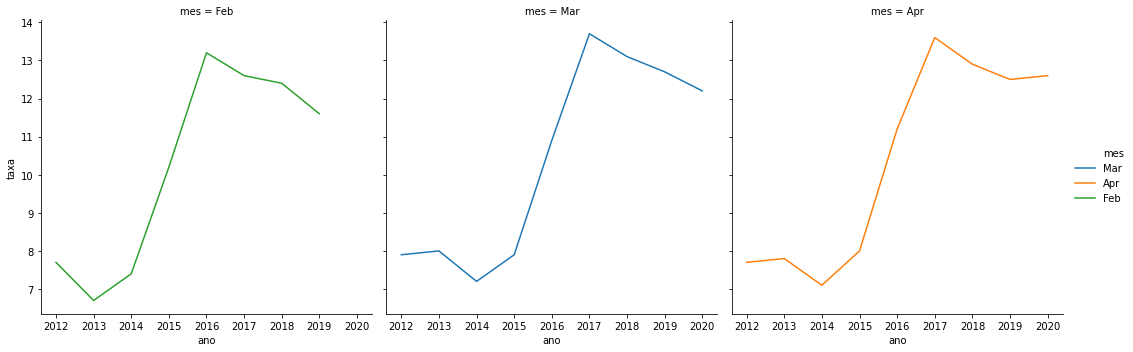

In [386]:
sns.relplot(x='ano',col='mes' , y='taxa', data=df_tri, hue='mes', kind='line', col_order=['Feb', 'Mar', 'Apr'])

<h2>Insighs and Asks</h2>
<li>Desocupation tax it was lesser than last three years, why?</li>
<li>Tax of opening statup growup or down? maybe it's scape of this desocupation jobs</li>
<li>Socials Benefits, growup or down?</li>
<li>Diference per month, what can be?</li>